In [1]:
# third party imports
import numpy as np
from numpy import exp, log, log10, sqrt, zeros, ones, linspace
import matplotlib.pyplot as plt
import numba
import pickle

# other project files
import par
import modes
import spectra

precomputing bessel functions...

bessel functions precomputed.



In [2]:
H0 = 1.0
h = H0/100.
OmegaB0 = 0.04968
OmegaC0 = 0.26754
OmegaG0 = 5.50234e-5
OmegaN0 = 3.74248e-5 

NT = 16384
NK = 256
#a0_pca = 0.0002
a0_pca = 0
A = np.linspace(par.a0, par.a_rec, 2*NT)
K = np.linspace(0.01,1000,NK)

# 3 fluid GDM functions
wC = np.zeros(2*NT)
cs2C = np.zeros((2*NT,NK))
wN = np.ones(2*NT)*1/3
cs2N = np.ones((2*NT,NK))*1/3

# solve using 3-fluid
Y = modes.solve_3fld(A, K, wC, cs2C, wN, cs2N,
        OmegaB0, OmegaC0, OmegaG0, OmegaN0, H0)


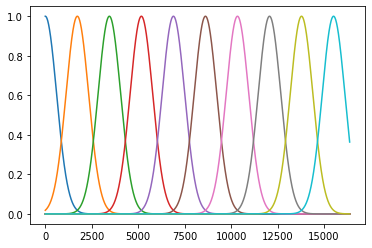

In [3]:
NC = 20
B = np.zeros((NC,NT))
width=NT//(NC-1)
for i in range(NC):
    B[i] = np.exp(-(np.arange(NT) - i*width)**2 / (width)**2)


plt.plot(B[::2,:].T)
plt.show()

In [ ]:
# load PCs and SVs
PC_q = np.array(
    [pickle.load(open("output/w-only/PC_q-"+str(q)+"_t-7.p", "rb")) for q in range(4,10)])
SV_q = np.array(
    [pickle.load(open("output/w-only/SV_q-"+str(q)+"_t-7.p", "rb"))[:10] for q in range(4,10)])

# flip PCs:
print(np.shape(PC_q))
for i in range(6):
    for j in range(10):
        PC_q[i,j,:]*=np.sign(np.sum(PC_q[i,j,:]))


In [5]:
n = 6

#infl= np.diag(F)@B
print(np.shape(PC_q))
plt.gca().set_prop_cycle('color',plt.cm.coolwarm(np.linspace(.0,1,6)))
leg =['16 components','32 components','64 components','128 components','256 components',
           '512 components', 'equality', 'recombination']
plt.title('PC '+str(n+1))
plt.plot(A[::2],PC_q[:,n].T/sqrt(SV_q[:,n]))
plt.axvline(par.a_eq,color = 'black',linestyle='--')
plt.axvline(par.a_rec,color = 'red',linestyle='--')
plt.axhline(0,color='gray',linestyle=':')
plt.legend(leg)
plt.xlabel('scale factor')
plt.show()

NameError: name 'PC_q' is not defined